In [81]:
#importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [82]:
# Load the breast cancer dataset
cancer_data = pd.read_csv('/content/cancer.csv')

In [83]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(cancer_data.head())

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

In [84]:
# Display the number of rows and columns in the dataset
print("\nShape of the dataset:")
print(cancer_data.shape)


Shape of the dataset:
(569, 33)


In [85]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(cancer_data.isnull().sum())



Missing values in the dataset:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [86]:
# Statistical measures about the data
print("\nStatistical measures about the data:")
print(cancer_data.describe())


Statistical measures about the data:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std    

In [87]:
# Displaying the count of positive and negative values
print("\nDistribution of the target variable:")
print(cancer_data['diagnosis'].value_counts())



Distribution of the target variable:
B    357
M    212
Name: diagnosis, dtype: int64


In [88]:
# Map 'M' (Malignant) to 1 and 'B' (Benign) to 0 in the 'diagnosis' column
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

In [89]:
# Splitting the Features and Target
X = cancer_data.drop(columns=['id', 'diagnosis'], axis=1)
Y = cancer_data['diagnosis']

In [90]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [91]:
# Calculate mean values for M and B individuals using only the features in X
mean_values = X.join(Y).groupby('diagnosis').mean()
print("\nMean values of different health indicators for M & B:")
print(mean_values)



Mean values of different health indicators for M & B:
           radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
0            12.146524     17.914762       78.075406  462.790196   
1            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                 0.092478          0.080085        0.046058   
1                 0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
0                     0.025717       0.174186                0.062867  ...   
1                     0.087990       0.192909                0.062680  ...   

           texture_worst  perimeter_worst   area_worst  smoothness_worst  \
diagnosis                 

In [92]:
# Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [105]:
print(X.shape, X_train.shape, X_test.shape)

(569, 31) (455, 31) (114, 31)


In [109]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [106]:
# Model Training - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=2)

In [110]:
# Training the Random Forest model with Training data
model.fit(X_train_imputed, Y_train)

RandomForestClassifier(random_state=2)

In [97]:
# Model Evaluation - Accuracy Score
# Accuracy on training data
X_train_prediction = model.predict(X_train_imputed)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [98]:
# Accuracy on test data
X_test_prediction = model.predict(X_test_imputed)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.956140350877193


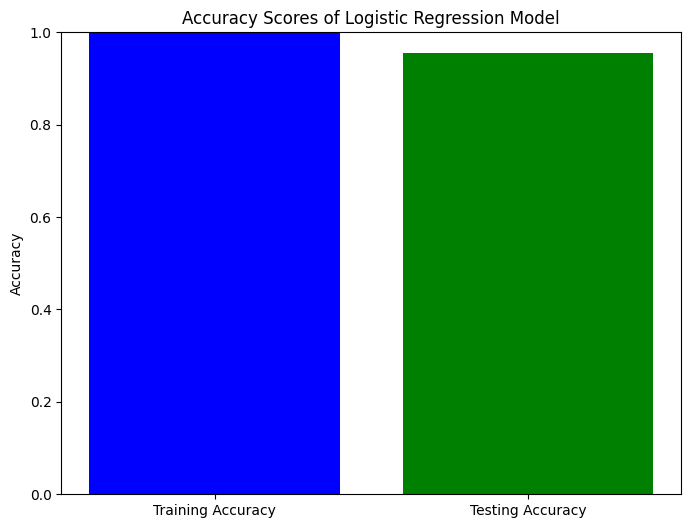

In [111]:

# Plotting the accuracy scores
labels = ['Training Accuracy', 'Testing Accuracy']
accuracy_scores = [training_data_accuracy, test_data_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Scores of Logistic Regression Model')
plt.ylim(0, 1)  # Set y-axis limit to show accuracy scores between 0 and 1
plt.ylabel('Accuracy')
plt.show()

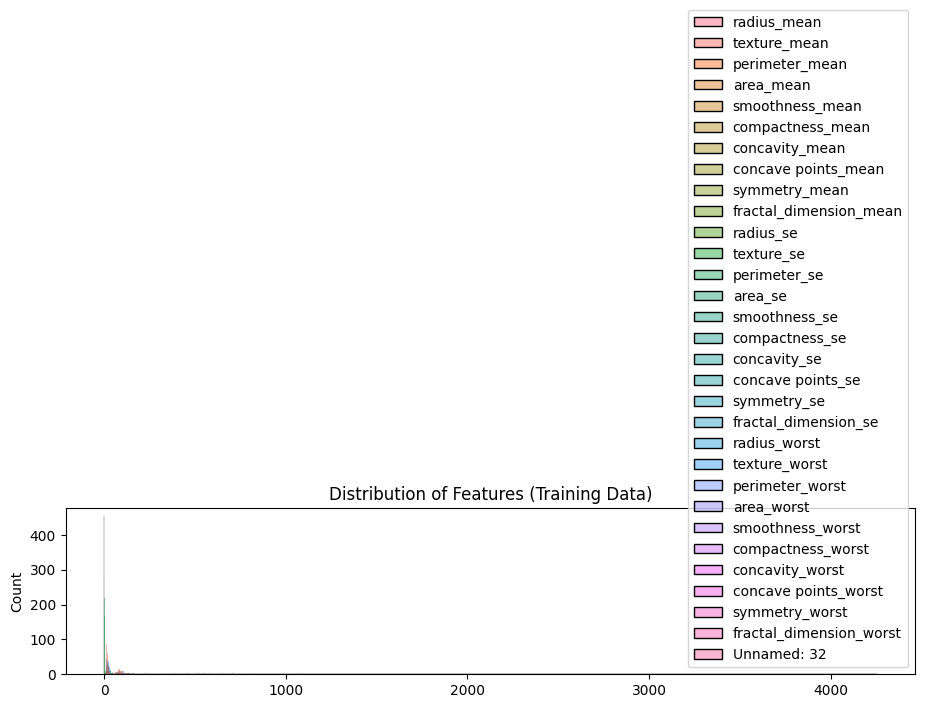

In [99]:
# Distribution plot for training data
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=X_train)
plt.title('Distribution of Features (Training Data)')
plt.tight_layout()
plt.show()

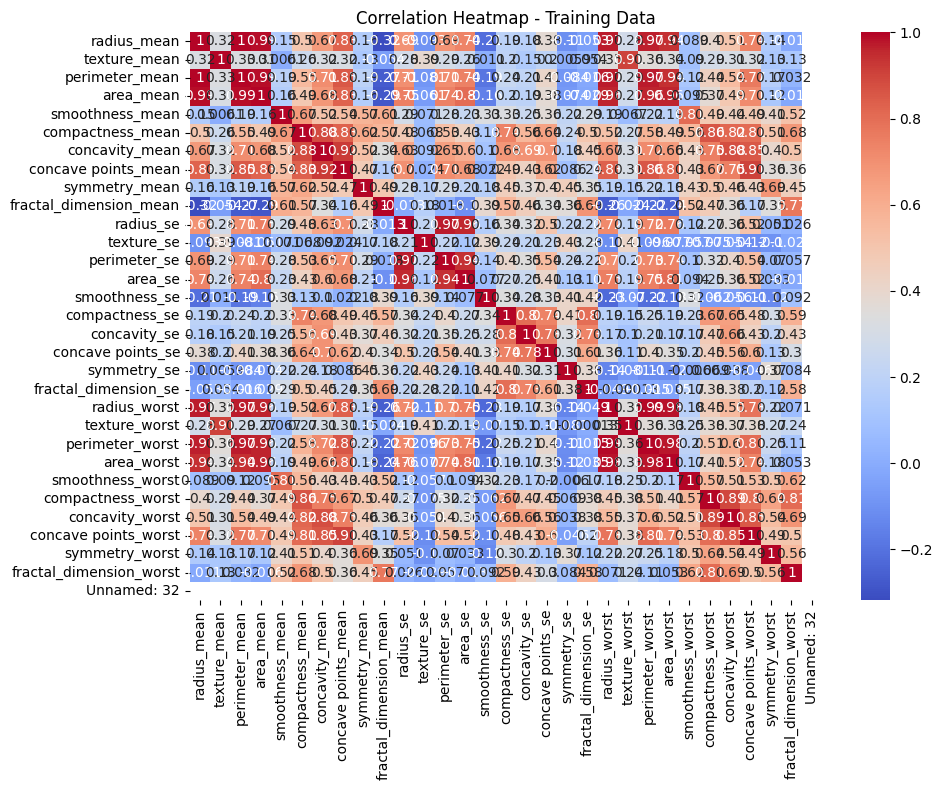

In [100]:
# Visualizing heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Training Data')
plt.tight_layout()
plt.show()

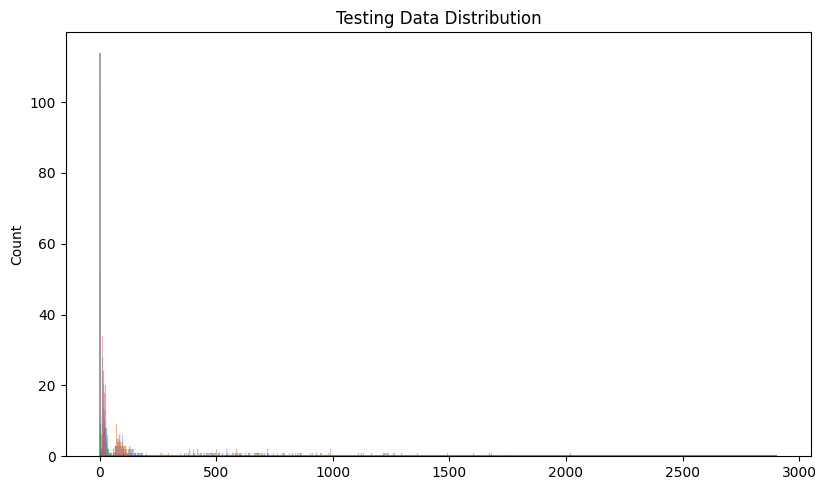

In [101]:
# Visualizing data distribution
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=X_test, legend=False)
plt.title('Testing Data Distribution')
plt.tight_layout()
plt.show()

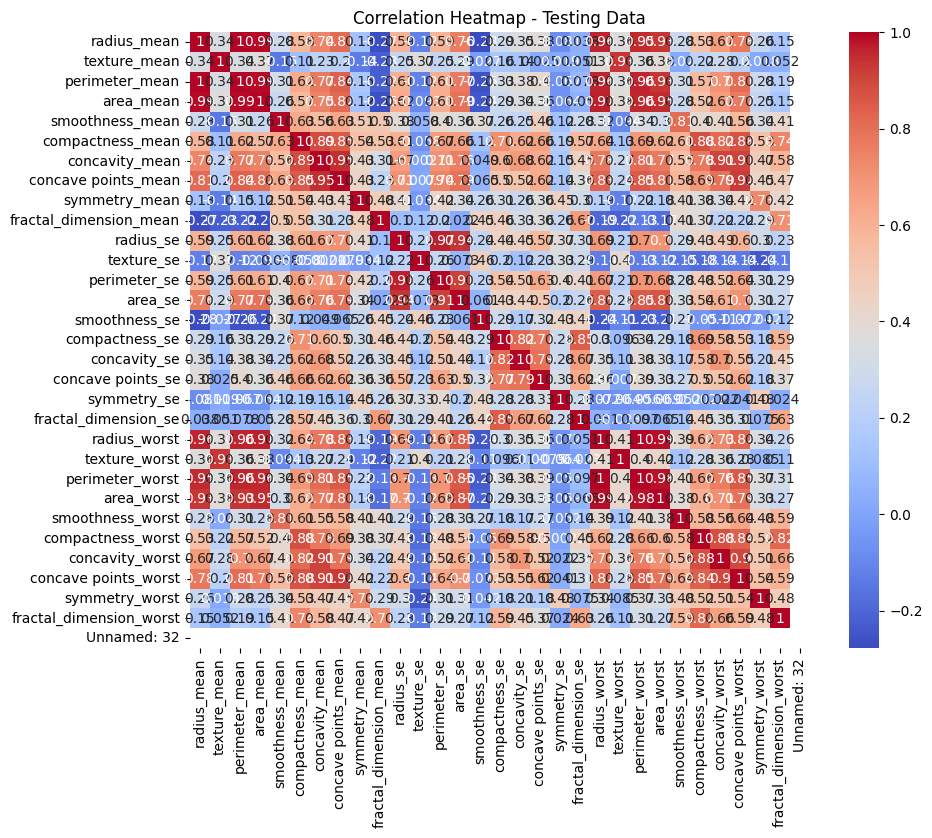

In [102]:
# Visualizing heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_test.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Testing Data')
plt.show()

In [103]:
# Building a Predictive System
# Example input data for prediction
input_data = np.array([17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189])

# Reshape the input data for prediction
input_data_reshaped = input_data.reshape(1, -1)

# Make predictions
prediction = model.predict(input_data_reshaped)

# Display the prediction
if prediction[0] == 1:
    print('\nThe tumor is Malignant (Cancerous).')
else:
    print('\nThe tumor is Benign (Non-Cancerous).')


The tumor is Malignant (Cancerous).


In [104]:
# Saving the trained model
import pickle
filename = 'bcancer.sav'
pickle.dump(model, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open('bcancer.sav', 'rb'))